In [ ]:
# 0.1) Starting Code and Helper Functions

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [226]:
#importing all the data, from the 'Calaveras Cataloguing' spreadsheet. Updated as of 3/16/20. 

inverts = pd.read_csv('Calaveras_Cataloguing_Invertebrates.csv')
inv_0 = inverts.copy()

verts = pd.read_csv('Calaveras_Cataloguing_Vertebrates.csv')
vert_0 = verts.copy()

In [227]:
##null_list

#takes in a list and reports if it is completely null values
#useful for cleaning up data

def null_list(array):
    temp1 = []
    for j in range(len(array)):
        if pd.isnull(array[j]) == True:
            temp1.append(array[j])
    if len(temp1) == len(array):
        return True
    else:
        return False

In [ ]:
# 0.2) Cleaning Up the Data

In [ ]:
Data entry for this project involved adding the field number (and the date that the fossil was found), the locality number, and the taxonomy (as specific as possible). A lot of the data is either left blank or is not uniform, so code needs to be written that parses through the data and cleans it up. 

In [228]:
##0.2.1) REMOVING ANY EMPTY ROWS

#First, there are extra rows assigned with no values in them. We will get rid of them. 

inv_1 = pd.DataFrame(columns=inverts.columns)

for i in range(len(inv_0)):
    if null_list(inv_0.iloc[i][2:22]) == False:
        inv_1 = inv_1.append(inv_0.iloc[i], ignore_index = False) #ignore_index is important, can keep track from OG data

In [229]:
##0.2.2) TAXONOMY DIVERSITY + IDENTIFYING MISTAKES

#A lot of the data entries have the taxonomies listed at lower levels
#Our first step will be to identify the diversity of the group at each taxonomic level (from genus to phylum)

#checks the rows where the column condition is met
#(inv_1.loc[inv_1['ordr'] == 'Pectinidae'])
#inv_2['phylum']

temp2 = []
for col in inv_1:
    temp2.append(inv_1[col].unique())

print('The Diversity of the Calaveras Inverts Across Taxonomic Levels (v1)')   
print()
    
for i in range(2,8):
    print(inv_1.columns[i])
    print(temp2[i])
    print()

The Diversity of the Calaveras Inverts Across Taxonomic Levels (v1)

phylum
[nan 'Plantae' 'V17011' 'V17017' 'Ichnofossil' 'Mollusca' 'Arthropoda'
 'Echinodermata ' 'Echinodermata' 'Annelida' 'ichnofossil' ' '
 'Foraminifera' 'Ichnotaxon' 'Teredolites']

class
[nan 'Bivalvia' 'Cirripedia' 'Mollusca' 'Gastropoda' 'Bivalvia '
 'Echinodermata' 'Pectinidae' 'Scaphopoda' 'Gastropoda ' 'Echinoidea '
 'Cirrepedia' 'Bivalvia?' 'Scaphopoda (?)' 'Gastropoda?' ' ' 'Crustacea '
 'Maxillopoda']

ordr
[nan 'Pectinidae' 'Ostreioida' 'Venerida' 'Lucinidae' 'Cirripedia'
 'Decapoda']

family
[nan 'Pectinidae' 'Ostreidae' 'Arcidae' 'Pectinidae ' 'Mactridae'
 'Lucinidae' 'Tellinidae' 'Lucinidae ' 'Yoldiidae' 'Trochidae' 'Mytilidae'
 'Lucinidea' 'pectinidae' 'Pectinidae?' 'Spondylidae' 'Cardiidae'
 'Cardiidae?' 'arcidae?']

originalGenus
[nan]

genus
['Patinopecten' nan 'Mytilus' 'Teredolites' ' ' 'patinopecten' 'Spisula'
 'Diplodanta' 'Astrodapsis' 'astrodapsis' '???' 'terodolites'
 'teredolites' 'Mytilid

In [ ]:
This is where we are at. We have cleaned up the data and gotten rid of extra space, and are now left with just the data (logged over 2 years by different people). The next step will be to use the lower taxonomic level IDs to fill out the upper levels. This will flush out the data and make it more useful later. Unfortunately, we will have to hard code some of this to account for variations in taxonomic levels. It will be lengthy and arduous. 

Next, we isolated the unique groups in each column of our data (shown above), which provides us with very useful information. Now we know what we have to 'hard code'. Unfortunately, due to different people doing data entry, there are some overlapping errors. These (according to taxonomic level) are:

-ERROR LIST-

1. Phylum: 
    1. locality numbers in the phylum,
    2. plantae is a kingdom, but we can ignore this
    3. the 2 'ichnofossil', 'ichnotaxon', and 'teredolites' are all the same thing, 
    4. foraminifera is not a phylum, it is an order, of the kingdom Protist, so we can ignore this
2. Class: 
    1. 3 bivalvia, 
    2. 3 gastropoda, 
    3. mollusca is a phylum, 
    4. pectinidae is a family, 
    5. 2 scaphopoda, 
    6. 2 cirripedia, 
    7. crustacea is a generic term (for phylum?), 
    8. echinodermata is a phylum, has multiple spellings
3. Order:
    1. pectinidae is a family,
    2. lucinidae is a family,
    3. cirripedia is a subclass, we are grouping it in 'class'    
4. Family:
    1. 4 pectinidae (one has a space after)
    2. 2 arcidae
    3. 2 lucinidae
    4. 2 cardiidae    
5. Genus:
    1. 2 patinopecten
    2. mytilidae is a family
    3. 3 teredolites
    4. diplodanta is spelled 'diplodonta'
    5. 2 astrodapsis

In [230]:
##0.2.3) TAXONOMIC ERROR CORRECTIONS

inv_2 = inv_1.copy()


#We will do a row by row sweep, because that is easiest for me
#According to the error list above

##########################################################################################################################

##1. phylum
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'phylum'] == ' '):
            inv_2.loc[i,'phylum'] = np.nan

#1A
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'phylum'] == 'V17011') or (inv_2.loc[i,'phylum'] == 'V17017'):
        inv_2.loc[i,'phylum'] = np.nan
#1B
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'phylum'] == 'Plantae') or (inv_2.loc[i,'phylum'] == 'Foraminifera'):
        inv_2.loc[i,'phylum'] = np.nan

#1C
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'phylum'] == 'Ichnofossil') or (inv_2.loc[i,'phylum'] == 'ichnofossil') or (inv_2.loc[i,'phylum'] == 'Ichnotaxon') or (inv_2.loc[i,'phylum'] == 'Teredolites'):
        inv_2.loc[i,'phylum'] = np.nan
        inv_2.loc[i,'genus'] = 'Teredolites'
        
##########################################################################################################################
        
##2. class
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'class'] == ' '):
            inv_2.loc[i,'class'] = np.nan

#2A
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'class'] == 'Bivalvia ') or (inv_2.loc[i,'class'] == 'Bivalvia?'):
        inv_2.loc[i,'class'] = 'Bivalvia'
#2B
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'class'] == 'Gastropoda ') or (inv_2.loc[i,'class'] == 'Gastropoda?'):
        inv_2.loc[i,'class'] = 'Gastropoda'
#2C
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'class'] == 'Mollusca'):
        inv_2.loc[i,'class'] = np.nan
        inv_2.loc[i,'phylum'] = 'Mollusca'        
#2D
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'class'] == 'Pectinidae'):
        inv_2.loc[i,'class'] = np.nan
        inv_2.loc[i,'family'] = 'Pectinidae'
#2E
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'class'] == 'Scaphopoda (?)'):
        inv_2.loc[i,'class'] = 'Scaphopoda'
#2F
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'class'] == 'Cirrepedia'):
        inv_2.loc[i,'class'] = 'Cirripedia'
#2G
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'class'] == 'Crustacea'):
        inv_2.loc[i,'class'] = np.nan
        inv_2.loc[i,'phylum'] = 'Arthropoda'
#2H
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'class'] == 'Echinodermata') or (inv_2.loc[i,'phylum'] == 'Echinodermata '):
        inv_2.loc[i,'class'] = np.nan
        inv_2.loc[i,'phylum'] = 'Echinodermata'

##########################################################################################################################

##3. order
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'ordr'] == ' '):
            inv_2.loc[i,'ordr'] = np.nan            
#3A
for i, row in inv_2.iterrows():
    if (inv_2.loc[i,'ordr'] == 'Pectinidae'):
        inv_2.loc[i,'ordr'] = np.nan
        inv_2.loc[i,'family'] = 'Pectinidae'
#3B
for i, row in inv_2.iterrows():
    if (inv_2.loc[i,'ordr'] == 'Lucinidae'):
        inv_2.loc[i,'ordr'] = np.nan
        inv_2.loc[i,'family'] = 'Lucinidae'        
#3C
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'ordr'] == 'Cirripedia'):
        inv_2.loc[i,'ordr'] = np.nan
        inv_2.loc[i,'class'] = 'Cirripedia'        

##########################################################################################################################

##4. family 
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'family'] == ' '):
            inv_2.loc[i,'family'] = np.nan            
#4A
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'family'] == 'Pectinidae ') or (inv_2.loc[i,'family'] == 'pectinidae') or (inv_2.loc[i,'family'] == 'Pectinidae?'):
        inv_2.loc[i,'family'] = 'Pectinidae'
#4B
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'family'] == 'arcidae?'):
        inv_2.loc[i,'family'] = 'Arcidae'
#4C
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'family'] == 'Lucinidea') or (inv_2.loc[i,'family'] == 'Lucinidae '):
        inv_2.loc[i,'family'] = 'Lucinidae'
#4D
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'family'] == 'Cardiidae?'):
        inv_2.loc[i,'family'] = 'Cardiidae'
        
##########################################################################################################################

##5. genus
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'genus'] == ' '):
            inv_2.loc[i,'genus'] = np.nan            
#5A
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'genus'] == 'patinopecten'):
        inv_2.loc[i,'genus'] = 'Patinopecten'   
#5B
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'genus'] == 'Mytilidae'):
        inv_2.loc[i,'genus'] = np.nan
        inv_2.loc[i,'family'] = 'Mytilidae'   
#5C
for i, row in inv_2.iterrows():
    if (inv_2.loc[i,'genus'] == 'teredolites') or (inv_2.loc[i,'genus'] == 'terodolites'):
        inv_2.loc[i,'genus'] = 'Teredolites'
#5D
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'genus'] == 'Diplodanta'):
        inv_2.loc[i,'genus'] = 'Diplodonta' 
#5E
for i, row in inv_2.iterrows():
    if  (inv_2.loc[i,'genus'] == 'astrodapsis'):
        inv_2.loc[i,'genus'] = 'Astrodapsis' 
        
temp3 = []
for col in inv_2:
    temp3.append(inv_2[col].unique())

print('The Diversity of the Calaveras Inverts Across Taxonomic Levels (v2)')   
print()
    
for i in range(2,8):
    print(inv_2.columns[i])
    print(temp3[i])
    print()

The Diversity of the Calaveras Inverts Across Taxonomic Levels (v2)

phylum
[nan 'Mollusca' 'Echinodermata' 'Arthropoda' 'Annelida']

class
[nan 'Bivalvia' 'Cirripedia' 'Gastropoda' 'Scaphopoda' 'Echinoidea '
 'Crustacea ' 'Maxillopoda']

ordr
[nan 'Ostreioida' 'Venerida' 'Decapoda']

family
[nan 'Pectinidae' 'Ostreidae' 'Arcidae' 'Mactridae' 'Lucinidae'
 'Tellinidae' 'Yoldiidae' 'Trochidae' 'Mytilidae' 'Spondylidae'
 'Cardiidae']

originalGenus
[nan]

genus
['Patinopecten' nan 'Mytilus' 'Teredolites' 'Spisula' 'Diplodonta'
 'Astrodapsis' '???']



In [ ]:
Great. This looks like some diversity data we can work with. Now we have to work backwards, using lower level taxonomic information to fill out the higher level information. This will be difficult to accomplish.

In [231]:
##0.2.4) FLUSHING OUT THE DATA

#We have our dataset...we know which lower taxa we have and can create functions based off them to fill out the higher levels.
#If I was smarter, I would have mapped out the taxonomic info onto an existing database to save time. 
#Alas, I have to hard code the rest. 

#Higher taxa info taken from ITIS, World Echinoidea Database (WED)

In [232]:
##Class (Phylum)
inv_3_1 = inv_2.copy()

#Bivalvia (Mollusca) ITIS
#Gastropoda (Mollusca) ITIS
#Scaphopoda (Mollusca) ITIS
for i, row in inv_3_1.iterrows():
    if  (inv_3_1.loc[i,'class'] == 'Bivalvia') or (inv_3_1.loc[i,'class'] == 'Gastropoda') or (inv_3_1.loc[i,'class'] == 'Scaphopoda'):
            inv_3_1.loc[i,'phylum'] = 'Mollusca'

#Cirripedia (Arthropoda) ITIS
#Crustacea (Arthropoda) ITIS
#Maxillopoda (Arthropoda) ITIS
for i, row in inv_3_1.iterrows():
    if  (inv_3_1.loc[i,'class'] == 'Cirripedia') or (inv_3_1.loc[i,'class'] == 'Crustacea') or (inv_3_1.loc[i,'class'] == 'Maxillopoda'):
            inv_3_1.loc[i,'phylum'] = 'Arthropoda'

#Echinoidea (Echinodermata) ITIS
for i, row in inv_3_1.iterrows():
    if (inv_3_1.loc[i,'class'] == 'Echinoidea'):
            inv_3_1.loc[i,'phylum'] = 'Echinodermata'

In [233]:
##Order (Class, Phylum)
inv_3_2 = inv_3_1.copy()

#Ostreioida (Bivalvia, Mollusca) ITIS
#Venerida (Bivalvia, Mollusca) ITIS
for i, row in inv_3_2.iterrows():
    if (inv_3_2.loc[i,'ordr'] == 'Ostreioida') or (inv_3_2.loc[i,'ordr'] == 'Venerida'):
        inv_3_2.loc[i,'class'] = 'Bivalvia'
        inv_3_2.loc[i,'phylum'] = 'Mollusca'

#Decapoda (Malacostraca, Arthropoda) ITIS
for i, row in inv_3_2.iterrows():
    if (inv_3_2.loc[i,'ordr'] == 'Decapoda'):
        inv_3_2.loc[i,'class'] = 'Malacostraca'
        inv_3_2.loc[i,'phylum'] = 'Arthropoda'

In [234]:
##Family (Order, Class, Phylum)
inv_3_3 = inv_3_2.copy()

#Pectinidae (Ostreoida, Bivalvia, Mollusca) ITIS
#Ostreidae (Ostreoida, Bivalvia, Mollusca) ITIS
#Spondylidae (Ostreoida, Bivalvia, Mollusca) ITIS
for i, row in inv_3_3.iterrows():
    if (inv_3_3.loc[i,'family'] == 'Pectinidae') or (inv_3_3.loc[i,'family'] == 'Ostreidae') or (inv_3_3.loc[i,'family'] == 'Spondylidae'):
        inv_3_3.loc[i,'ordr'] = 'Ostreioida'
        inv_3_3.loc[i,'class'] = 'Bivalvia'
        inv_3_3.loc[i,'phylum'] = 'Mollusca'

#Arcidae (Arcoida, Bivalvia, Mollusca) ITIS
for i, row in inv_3_3.iterrows():
    if (inv_3_3.loc[i,'family'] == 'Arcidae'):
        inv_3_3.loc[i,'ordr'] = 'Arcoida'
        inv_3_3.loc[i,'class'] = 'Bivalvia'
        inv_3_3.loc[i,'phylum'] = 'Mollusca'

#Mactridae (Veneroida, Bivalvia, Mollusca) ITIS
#Lucinidae (Veneroida, Bivalvia, Mollusca) ITIS
#Tellinidae (Veneroida, Bivalvia, Mollusca) ITIS
#Cardiidae (Veneroida, Bivalvia, Mollusca) ITIS
for i, row in inv_3_3.iterrows():
    if (inv_3_3.loc[i,'family'] == 'Mactridae') or (inv_3_3.loc[i,'family'] == 'Lucinidae') or (inv_3_3.loc[i,'family'] == 'Tellinidae') or (inv_3_3.loc[i,'family'] == 'Cardiidae'):
        inv_3_3.loc[i,'ordr'] = 'Veneroida'
        inv_3_3.loc[i,'class'] = 'Bivalvia'
        inv_3_3.loc[i,'phylum'] = 'Mollusca'

#Yoldiidae (Nuculoida, Bivalvia, Mollusca) ITIS
for i, row in inv_3_3.iterrows():
    if (inv_3_3.loc[i,'family'] == 'Yoldiidae'):
        inv_3_3.loc[i,'ordr'] = 'Nuculoida'
        inv_3_3.loc[i,'class'] = 'Bivalvia'
        inv_3_3.loc[i,'phylum'] = 'Mollusca'

#Trochidae (Archaeogastropoda, Gastropoda, Mollusca) ITIS
for i, row in inv_3_3.iterrows():
    if (inv_3_3.loc[i,'family'] == 'Trochidae'):
        inv_3_3.loc[i,'ordr'] = 'Archaegastropoda'
        inv_3_3.loc[i,'class'] = 'Gastropoda'
        inv_3_3.loc[i,'phylum'] = 'Mollusca'

#Mytilidae (Mytiloida, Bivalvia, Mollusca) ITIS
for i, row in inv_3_3.iterrows():
    if (inv_3_3.loc[i,'family'] == 'Mytilidae'):
        inv_3_3.loc[i,'ordr'] = 'Mytiloida'
        inv_3_3.loc[i,'class'] = 'Bivalvia'
        inv_3_3.loc[i,'phylum'] = 'Mollusca'

In [235]:
##Genus (Family, Order, Class, Phylum)
inv_3_4 = inv_3_3.copy()

#Patinopecten (Pectinidae, Ostreoida, Bivalvia, Mollusca) ITIS
for i, row in inv_3_4.iterrows():
    if (inv_3_4.loc[i,'genus'] == 'Patinopecten'):
        inv_3_4.loc[i,'family'] = 'Pectinidae'
        inv_3_4.loc[i,'ordr'] = 'Ostreioida'
        inv_3_4.loc[i,'class'] = 'Bivalvia'
        inv_3_4.loc[i,'phylum'] = 'Mollusca'

#Mytilus (Mytlidae, Mytiloida, Bivalvia, Mollusca) ITIS
for i, row in inv_3_4.iterrows():
    if (inv_3_4.loc[i,'genus'] == 'Mytilus'):
        inv_3_4.loc[i,'family'] = 'Mytilidae'
        inv_3_4.loc[i,'ordr'] = 'Mytiloida'
        inv_3_4.loc[i,'class'] = 'Bivalvia'
        inv_3_4.loc[i,'phylum'] = 'Mollusca'

#Teredolites (ASK ASHLEY, WHAT DO WE DO ABOUT ICHNOFOSSILS???)

#Spisula (Mactridae, Veneroida, Bivalvia, Mollusca) ITIS
for i, row in inv_3_4.iterrows():
    if (inv_3_4.loc[i,'genus'] == 'Spisula'):
        inv_3_4.loc[i,'family'] = 'Mactridae'
        inv_3_4.loc[i,'ordr'] = 'Veneroida'
        inv_3_4.loc[i,'class'] = 'Bivalvia'
        inv_3_4.loc[i,'phylum'] = 'Mollusca'

#Diplodonta (Ungulinidae, Veneroida, Bivalvia, Mollusca) ITIS
for i, row in inv_3_4.iterrows():
    if (inv_3_4.loc[i,'genus'] == 'Diplodonta'):
        inv_3_4.loc[i,'family'] = 'Ungulinidae'
        inv_3_4.loc[i,'ordr'] = 'Veneroida'
        inv_3_4.loc[i,'class'] = 'Bivalvia'
        inv_3_4.loc[i,'phylum'] = 'Mollusca'

#Astrodapsis (Echinarachniidae, Clypeasteroida, Echinoidea, Echinodermata) WED
for i, row in inv_3_4.iterrows():
    if (inv_3_4.loc[i,'genus'] == 'Astrodapsis'):
        inv_3_4.loc[i,'family'] = 'Echinarachniidae'
        inv_3_4.loc[i,'ordr'] = 'Clypeasteroida'
        inv_3_4.loc[i,'class'] = 'Echinoidea'
        inv_3_4.loc[i,'phylum'] = 'Echinodermata'

In [236]:
inv_3_4

,spec_no,loc_ID_num,phylum,class,ordr,family,originalGenus,genus,subgenus,originalSubgenus,...,subspecies,modifiers,num_individuals,element,field_num,Associated With,ID by,ID date,Catalogued by,Notes
0,300100,V17009,Mollusca,Bivalvia,Ostreioida,Pectinidae,NaN,Patinopecten,NaN,NaN,...,NaN,NaN,1.0,shell,JPW 12-03-2013/1,NaN,"Robins, Cristina",10-16-2017,"Dangsangtong, Peter",NaN
1,300101,V17018,Mollusca,Bivalvia,Ostreioida,Pectinidae,NaN,Patinopecten,NaN,NaN,...,NaN,NaN,1.0,shell,JPW 04-10-2012/3,Associated with 300102,"Robins, Cristina",10-16-2017,"Dangsangtong, Peter",NaN
2,300102,V17018,Mollusca,Bivalvia,Ostreioida,Pectinidae,NaN,Patinopecten,NaN,NaN,...,NaN,NaN,1.0,shell,JPW 04-10-2012/3,Associated with 300101,"Robins, Cristina",10-16-2017,"Dangsangtong, Peter",NaN
3,300103,V17011,Mollusca,Bivalvia,Ostreioida,Pectinidae,NaN,Patinopecten,NaN,NaN,...,NaN,NaN,1.0,shell,JPW 03-21-2012/5,NaN,"Robins, Cristina",10-16-2017,"Dangsangtong, Peter",NaN
4,300104,V17011,Mollusca,Bivalvia,Ostreioida,Pectinidae,NaN,Patinopecten,NaN,NaN,...,NaN,NaN,1.0,external mold,JPW 04-22-2014/3,NaN,"Robins, Cristina",10-16-2017,"Dangsangtong, Peter",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,303230,V17021,Mollusca,Bivalvia,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,external mold,JPW 01-15-2015,assumed JPW/locality,NaN,08-01-2019,"Mackenzie, Laura",NaN
3131,303231,V17021,NaN,NaN,NaN,NaN,NaN,Teredolites,NaN,NaN,...,NaN,NaN,NaN,burrows,JPW 01-15-2015,assumed JPW/locality; part and counterpart,NaN,08-01-2019,"Mackenzie, Laura",NaN
3132,303232,V17021,Mollusca,Bivalvia,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,shell fragment,JPW 01-15-2015,assumed JPW/locality,NaN,08-01-2019,"Mackenzie, Laura",NaN
3133,303233,V17021,Mollusca,Bivalvia,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,shell fragment,JPW 01-15-2015,assumed JPW/locality,NaN,08-01-2019,"Mackenzie, Laura",NaN


In [ ]:
That was painful, but useful in consolidating the data into a uniform structure, ready for analysis. The final task for my data cleaning involved making all the field numbers uniform, and converting them from strings to classes using datetime, so that I can begin looking at things quantitatively. 

First, I made a function called format_test that looked for whether each fossil had a JPW number and could be converted into a datetime. This is shown in the cell below. If that condition failed, the data was either fixed for formatting or excluded. 

I put inv_3_4 into an Excel spreadsheet so I could make formatting errors and correct any anomalies, just do a general "cleaning" of the data. 

In [237]:
def format_test(df,index,column):
    if (str(df.iloc[index][column])[0:3] == 'JPW') or (str(df.iloc[index][column])[0:3] == 'CDP'):
        try:
            dt.strptime(str(df.iloc[index][column])[4:14], '%m-%d-%Y')
            return True
        except ValueError:
            return False
        #print(str(i) + " " + str(extracted.iloc[i][1])[0:3] + "          .") This was just to test the function.
    else:
        return False

In [238]:
temp4 = []
for i in range(len(inv_3_4)):
    if format_test(inv_3_4,i,16) == True:
        temp4.append(True)
    else:
        temp4.append(False)
        
inv_3_4.insert(17, 'filtered', temp4)

In [239]:
#We can use the generated list below to find which dates can be corrected, and 
#which data needs to be removed from analysis due to incomplete records. 

#for i in range(len(inv_3_4)):
    #print(inv_3_4.iloc[i][0])
    #print(inv_3_4.iloc[i][16:18])
    #print()

In [240]:
#downloading the current rendition of the data to an excel file
#I will manually fix minor formatting issues and return the file as 'cleaned.xlsx'

with pd.ExcelWriter('calaveras_inverts_for_cleaning.xlsx') as writer:
    inv_3_4.to_excel(writer)

In [241]:
pwd

'/Users/Sid/Desktop/UCMP/githubLL'

In [ ]:
# STOP. Run all cells until here to edit, found in the for_cleaning.xlsx

In [242]:
cleaned = pd.read_excel('calaveras_inverts_cleaned.xlsx')
cleaned = cleaned.drop(columns=['Unnamed: 0'])

#printing for testing
#for i in range(len(cleaned)):
    #print(cleaned.iloc[i][1])
    #print(cleaned.iloc[i][16:18])
    #print()

In [243]:
temp5 = []
for i in range(len(cleaned)):
    if format_test(cleaned,i,16) == True:
        temp5.append(True)
    else:
        temp5.append(False)

cleaned.insert(18, 'filtered2', temp5)

In [244]:
inv_4 = pd.DataFrame(columns=cleaned.columns)

for i in range(len(cleaned)):
    if cleaned.iloc[i][18] == True:
        inv_4 = inv_4.append(cleaned.iloc[i], ignore_index = False)

In [245]:
dates = []

for index in range(len(inv_4)):
    dates.append(dt.strptime(str(inv_4.iloc[index][16])[4:14], '%m-%d-%Y'))

inv_4.insert(17, 'date', dates)

In [246]:
#we extract the relevant data

extracted = inv_4[['spec_no', 'field_num', 'date', 'phylum', 'class', 'ordr', 'family', 'genus']].copy()
extracted

,spec_no,field_num,date,phylum,class,ordr,family,genus
0,300100,JPW 12-03-2013/1,2013-12-03,Mollusca,Bivalvia,Ostreioida,Pectinidae,Patinopecten
1,300101,JPW 04-10-2012/3,2012-04-10,Mollusca,Bivalvia,Ostreioida,Pectinidae,Patinopecten
2,300102,JPW 04-10-2012/3,2012-04-10,Mollusca,Bivalvia,Ostreioida,Pectinidae,Patinopecten
3,300103,JPW 03-21-2012/5,2012-03-21,Mollusca,Bivalvia,Ostreioida,Pectinidae,Patinopecten
4,300104,JPW 04-22-2014/3,2014-04-22,Mollusca,Bivalvia,Ostreioida,Pectinidae,Patinopecten
...,...,...,...,...,...,...,...,...
3076,303230,JPW 01-15-2015,2015-01-15,Mollusca,Bivalvia,NaN,NaN,NaN
3077,303231,JPW 01-15-2015,2015-01-15,NaN,NaN,NaN,NaN,Teredolites
3078,303232,JPW 01-15-2015,2015-01-15,Mollusca,Bivalvia,NaN,NaN,NaN
3079,303233,JPW 01-15-2015,2015-01-15,Mollusca,Bivalvia,NaN,NaN,NaN


In [247]:
extracted.loc[0,'date'].day_name()

'Tuesday'

In [248]:
extracted['date'].min()

Timestamp('2011-06-21 00:00:00')

In [249]:
time_series = extracted.sort_values(by="date")
time_series

,spec_no,field_num,date,phylum,class,ordr,family,genus
761,300861,JPW 06-21-2011/1,2011-06-21,Arthropoda,NaN,NaN,NaN,NaN
383,300483,JPW 08-05-2011/1,2011-08-05,Mollusca,NaN,NaN,NaN,NaN
380,300480,JPW 10-10-2011/1B,2011-10-10,Mollusca,Bivalvia,Ostreioida,Pectinidae,NaN
61,300161,JPW 10-10-2011/1D,2011-10-10,NaN,NaN,NaN,NaN,NaN
786,300886,JPW 10-10-2011/1E,2011-10-10,Mollusca,Gastropoda,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2988,303097,JPW 01-31-2019,2019-01-31,Mollusca,Bivalvia,Ostreioida,Pectinidae,NaN
2987,303096,JPW 01-31-2019,2019-01-31,Mollusca,Gastropoda,NaN,NaN,NaN
3032,303141,JPW 01-31-2019,2019-01-31,Mollusca,Bivalvia,NaN,NaN,NaN
3034,303143,JPW 01-31-2019,2019-01-31,Mollusca,Bivalvia,NaN,NaN,NaN


In [250]:
##0.4.1) REMOVING ANY EMPTY ROWS AGAIN

#First, there are extra rows assigned with no values in them. We will get rid of them. 

inv_5 = pd.DataFrame(columns=time_series.columns)

for i in range(len(time_series)):
    if null_list(time_series.iloc[i][3:7]) == False:
        inv_5 = inv_5.append(time_series.iloc[i], ignore_index = True) #ignore_index is important, it is now the index of the time series



In [251]:
inv_5

,spec_no,field_num,date,phylum,class,ordr,family,genus
0,300861,JPW 06-21-2011/1,2011-06-21,Arthropoda,NaN,NaN,NaN,NaN
1,300483,JPW 08-05-2011/1,2011-08-05,Mollusca,NaN,NaN,NaN,NaN
2,300480,JPW 10-10-2011/1B,2011-10-10,Mollusca,Bivalvia,Ostreioida,Pectinidae,NaN
3,300886,JPW 10-10-2011/1E,2011-10-10,Mollusca,Gastropoda,NaN,NaN,NaN
4,300160,JPW 10-10-2011/1D,2011-10-10,Mollusca,Bivalvia,Ostreioida,Pectinidae,Patinopecten
...,...,...,...,...,...,...,...,...
2898,303138,JPW 01-31-2019,2019-01-31,Mollusca,Bivalvia,NaN,NaN,NaN
2899,303097,JPW 01-31-2019,2019-01-31,Mollusca,Bivalvia,Ostreioida,Pectinidae,NaN
2900,303096,JPW 01-31-2019,2019-01-31,Mollusca,Gastropoda,NaN,NaN,NaN
2901,303141,JPW 01-31-2019,2019-01-31,Mollusca,Bivalvia,NaN,NaN,NaN


In [252]:
ts2 = inv_5.copy()

In [253]:
ts2

,spec_no,field_num,date,phylum,class,ordr,family,genus
0,300861,JPW 06-21-2011/1,2011-06-21,Arthropoda,NaN,NaN,NaN,NaN
1,300483,JPW 08-05-2011/1,2011-08-05,Mollusca,NaN,NaN,NaN,NaN
2,300480,JPW 10-10-2011/1B,2011-10-10,Mollusca,Bivalvia,Ostreioida,Pectinidae,NaN
3,300886,JPW 10-10-2011/1E,2011-10-10,Mollusca,Gastropoda,NaN,NaN,NaN
4,300160,JPW 10-10-2011/1D,2011-10-10,Mollusca,Bivalvia,Ostreioida,Pectinidae,Patinopecten
...,...,...,...,...,...,...,...,...
2898,303138,JPW 01-31-2019,2019-01-31,Mollusca,Bivalvia,NaN,NaN,NaN
2899,303097,JPW 01-31-2019,2019-01-31,Mollusca,Bivalvia,Ostreioida,Pectinidae,NaN
2900,303096,JPW 01-31-2019,2019-01-31,Mollusca,Gastropoda,NaN,NaN,NaN
2901,303141,JPW 01-31-2019,2019-01-31,Mollusca,Bivalvia,NaN,NaN,NaN


# 1) Collection Curve of Invertebrate Fossils

Let us correlate the number of taxa collected with their date of discovery. This needs to be done in a couple steps. We can use the field number as the discovery date (x-axis), and the taxonomies from the spreadsheet (y-axis). 

In [264]:
names = pd.DataFrame(columns = ts2.columns[3:7])
numbers = pd.DataFrame(columns = ts2.columns[3:7])
its = pd.DataFrame(columns = ts2.columns[3:7]) #interim time series

for i in range(len(ts2)):
    
    its = its.append(ts2.iloc[i][3:7])

    lst_uniq = []
    lst_nuniq = []
    
    for j in range(0,4):
        tax_uniq = its.iloc[:,j].unique() 
        tax_uniq = tax_uniq[~pd.isnull(tax_uniq)]
        lst_uniq.append(tax_uniq)
        
        ntax_uniq = len(tax_uniq)
        lst_nuniq.append(ntax_uniq)
    
    names = names.append((pd.Series(lst_uniq, index = names.columns)), ignore_index=True)
    
    numbers = numbers.append((pd.Series(lst_nuniq, index = numbers.columns)), ignore_index=True)
    
    print('Completed Trial ' + str(i + 1) + ' Out of ' + str(len(ts2)))
    print()
    print('-Unique Taxa Lists: ' + str(lst_uniq))
    print()
    print('-Number of Unique Taxa: ' + str(lst_nuniq))
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print()

Completed Trial 1 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda'], dtype=object), array([], dtype=object), array([], dtype=object), array([], dtype=object)]

-Number of Unique Taxa: [1, 0, 0, 0]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca'], dtype=object), array([], dtype=object), array([], dtype=object), array([], dtype=object)]

-Number of Unique Taxa: [2, 0, 0, 0]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 3 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca'], dtype=object), array(['Bivalvia'], dtype=object), array(['Ostreioida'], dtype=object), array(['Pectinidae'], dtype=object)]

-Number of Unique Taxa: [2, 1, 1, 1]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 4 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca'], dtype=object), array(['Bivalvia', 'Ga

Completed Trial 35 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca'], dtype=object), array(['Bivalvia', 'Gastropoda'], dtype=object), array(['Ostreioida'], dtype=object), array(['Pectinidae'], dtype=object)]

-Number of Unique Taxa: [2, 2, 1, 1]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 36 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca'], dtype=object), array(['Bivalvia', 'Gastropoda'], dtype=object), array(['Ostreioida'], dtype=object), array(['Pectinidae'], dtype=object)]

-Number of Unique Taxa: [2, 2, 1, 1]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 37 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca'], dtype=object), array(['Bivalvia', 'Gastropoda'], dtype=object), array(['Ostreioida'], dtype=object), array(['Pectinidae'], dtype=object)]

-Number of Unique Taxa: [2, 2, 1, 1]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 61 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida'], dtype=object), array(['Pectinidae'], dtype=object)]

-Number of Unique Taxa: [2, 3, 1, 1]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 62 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida'], dtype=object), array(['Pectinidae'], dtype=object)]

-Number of Unique Taxa: [2, 3, 1, 1]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 63 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida'], dtype=object), array(['Pectinidae'], dtype=object)]

-Number of Unique Taxa: [2, 3, 1, 1]
~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 88 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 2]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 89 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 2]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 90 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], d

Completed Trial 113 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 2]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 114 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 2]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 115 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida']

Completed Trial 137 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 2]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 138 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 2]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 139 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida']

Completed Trial 161 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 2]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 162 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 2]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 163 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida']

Completed Trial 185 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 2]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 186 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 2]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 187 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida']

Completed Trial 210 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 3]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 211 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 3]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 212 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array([

Completed Trial 234 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 3]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 235 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 3]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 236 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array([

Completed Trial 262 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 3]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 263 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 3]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 264 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array([

Completed Trial 287 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 3]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 288 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 3]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 289 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array([

Completed Trial 312 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 3]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 313 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 3]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 314 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array([

Completed Trial 336 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 3]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 337 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 3]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 338 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array([

Completed Trial 359 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 3]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 360 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 3]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 361 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array([

Completed Trial 385 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 3]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 386 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae'], dtype=object)]

-Number of Unique Taxa: [3, 3, 2, 3]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 387 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia'], dtype=object), array([

Completed Trial 414 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 2, 3]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 415 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 2, 3]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 416 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropo

Completed Trial 441 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 442 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 443 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'],

Completed Trial 465 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 466 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 467 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'],

Completed Trial 489 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 490 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 491 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'],

Completed Trial 514 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 515 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 516 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'],

Completed Trial 537 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 538 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 539 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'],

Completed Trial 563 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 564 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 565 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'],

Completed Trial 588 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 589 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 590 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'],

Completed Trial 613 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 614 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 615 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'],

Completed Trial 635 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 636 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 637 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'],

Completed Trial 659 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 660 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 661 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'],

Completed Trial 683 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 684 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae'], dtype=object)]

-Number of Unique Taxa: [3, 4, 3, 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 685 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'],

Completed Trial 707 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae'],
      dtype=object)]

-Number of Unique Taxa: [3, 4, 4, 5]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 708 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda'],
      dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae'],
      dtype=object)]

-Number of Unique Taxa: [3, 4, 4, 5]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 709 Out of 2903

-Unique

Completed Trial 732 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae'], dtype=object)]

-Number of Unique Taxa: [3, 5, 6, 8]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 733 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae'

Completed Trial 756 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae'], dtype=object)]

-Number of Unique Taxa: [3, 5, 6, 8]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 757 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae'

Completed Trial 778 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae'], dtype=object)]

-Number of Unique Taxa: [3, 5, 6, 8]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 779 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae'

Completed Trial 802 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae'], dtype=object)]

-Number of Unique Taxa: [3, 5, 6, 8]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 803 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae'

Completed Trial 827 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae'], dtype=object)]

-Number of Unique Taxa: [3, 5, 6, 8]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 828 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae'

Completed Trial 852 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae'], dtype=object)]

-Number of Unique Taxa: [3, 5, 6, 8]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 853 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae'

Completed Trial 877 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae'], dtype=object)]

-Number of Unique Taxa: [3, 5, 6, 8]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 878 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae'

Completed Trial 902 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae'], dtype=object)]

-Number of Unique Taxa: [3, 5, 6, 8]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 903 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae'

Completed Trial 927 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae'], dtype=object)]

-Number of Unique Taxa: [3, 5, 6, 8]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 928 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae'

Completed Trial 952 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae'], dtype=object)]

-Number of Unique Taxa: [3, 5, 6, 8]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 953 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae'

Completed Trial 977 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae'], dtype=object)]

-Number of Unique Taxa: [3, 5, 6, 8]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 978 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae'

Completed Trial 1002 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae'], dtype=object)]

-Number of Unique Taxa: [3, 5, 6, 8]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1003 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinida

Completed Trial 1027 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae'], dtype=object)]

-Number of Unique Taxa: [3, 5, 6, 8]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1028 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinida

Completed Trial 1053 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae'], dtype=object)]

-Number of Unique Taxa: [3, 5, 6, 8]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1054 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinida

Completed Trial 1078 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae'], dtype=object)]

-Number of Unique Taxa: [3, 6, 6, 8]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1079 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
  

Completed Trial 1102 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae'], dtype=object)]

-Number of Unique Taxa: [3, 6, 6, 8]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1103 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
  

Completed Trial 1129 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae'], dtype=object)]

-Number of Unique Taxa: [3, 6, 6, 8]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1130 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
  

Completed Trial 1153 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae'], dtype=object)]

-Number of Unique Taxa: [3, 6, 6, 8]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1154 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
  

Completed Trial 1178 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae'],
      dtype=object)]

-Number of Unique Taxa: [3, 6, 6, 9]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1179 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arci

Completed Trial 1203 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 10]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1204 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 

Completed Trial 1228 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 10]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1229 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 

Completed Trial 1253 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 10]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1254 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 

Completed Trial 1278 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 10]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1279 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 

Completed Trial 1302 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 10]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1303 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 

Completed Trial 1327 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 10]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1328 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 

Completed Trial 1351 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 10]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1352 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 

Completed Trial 1376 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 10]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1377 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 

Completed Trial 1401 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 10]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1402 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 

Completed Trial 1426 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 10]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1427 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 

Completed Trial 1451 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 10]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1452 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 

Completed Trial 1475 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 10]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1476 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 

Completed Trial 1499 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 10]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1500 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 

Completed Trial 1524 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 10]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1525 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 

Completed Trial 1549 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 10]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1550 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 

Completed Trial 1573 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 10]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1574 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 

Completed Trial 1598 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 10]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1599 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 

Completed Trial 1622 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 10]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1623 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 

Completed Trial 1646 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 10]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1647 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 

Completed Trial 1670 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 10]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1671 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 

Completed Trial 1694 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1695 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 1718 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1719 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 1742 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1743 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    


-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1767 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'],

Completed Trial 1791 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1792 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 1815 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1816 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 1839 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1840 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 1863 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1864 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 1887 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1888 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 1911 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1912 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 1935 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1936 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 1959 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1960 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 1983 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 1984 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2007 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2008 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2031 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2032 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2055 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2056 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2078 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2079 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2102 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2103 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2126 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2127 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2150 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2151 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2174 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2175 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2198 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2199 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2222 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2223 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2246 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2247 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2269 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2270 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2293 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2294 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2316 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2317 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2339 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2340 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2363 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2364 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2386 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2387 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2410 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2411 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2433 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2434 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2456 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2457 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2480 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [3, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2481 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata'], dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
    

Completed Trial 2504 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [4, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2505 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arco

Completed Trial 2528 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [4, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2529 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arco

Completed Trial 2551 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [4, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2552 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arco

Completed Trial 2576 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [4, 7, 7, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2577 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arco

Completed Trial 2599 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida', 'Venerida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [4, 7, 8, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2600 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytil

Completed Trial 2623 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida', 'Venerida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [4, 7, 8, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2624 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytil

Completed Trial 2647 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida', 'Venerida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [4, 7, 8, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2648 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytil

Completed Trial 2671 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida', 'Venerida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [4, 7, 8, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2672 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytil

Completed Trial 2695 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida', 'Venerida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [4, 7, 8, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2696 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytil

Completed Trial 2719 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida', 'Venerida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [4, 7, 8, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2720 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytil

Completed Trial 2743 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida', 'Venerida'], dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae'], dtype=object)]

-Number of Unique Taxa: [4, 7, 8, 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2744 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytil

Completed Trial 2767 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida', 'Venerida', 'Archaegastropoda'],
      dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae', 'Trochidae'], dtype=object)]

-Number of Unique Taxa: [4, 7, 9, 12]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2768 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dty

Completed Trial 2791 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida', 'Venerida', 'Archaegastropoda'],
      dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae', 'Trochidae'], dtype=object)]

-Number of Unique Taxa: [4, 7, 9, 12]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2792 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dty

Completed Trial 2815 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida', 'Venerida', 'Archaegastropoda'],
      dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae', 'Trochidae'], dtype=object)]

-Number of Unique Taxa: [4, 7, 9, 12]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2816 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dty

Completed Trial 2838 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida', 'Venerida', 'Archaegastropoda'],
      dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae', 'Trochidae'], dtype=object)]

-Number of Unique Taxa: [4, 7, 9, 12]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2839 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dty

Completed Trial 2862 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida', 'Venerida', 'Archaegastropoda'],
      dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae', 'Trochidae'], dtype=object)]

-Number of Unique Taxa: [4, 7, 9, 12]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2863 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dty

Completed Trial 2886 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dtype=object), array(['Ostreioida', 'Mytiloida', 'Arcoida', 'Veneroida', 'Nuculoida',
       'Decapoda', 'Clypeasteroida', 'Venerida', 'Archaegastropoda'],
      dtype=object), array(['Pectinidae', 'Mytilidae', 'Ostreidae', 'Arcidae', 'Mactridae',
       'Tellinidae', 'Lucinidae', 'Yoldiidae', 'Spondylidae',
       'Echinarachniidae', 'Ungulinidae', 'Trochidae'], dtype=object)]

-Number of Unique Taxa: [4, 7, 9, 12]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Completed Trial 2887 Out of 2903

-Unique Taxa Lists: [array(['Arthropoda', 'Mollusca', 'Echinodermata', 'Annelida'],
      dtype=object), array(['Bivalvia', 'Gastropoda', 'Cirripedia', 'Maxillopoda',
       'Malacostraca', 'Scaphopoda', 'Echinoidea'], dty

In [280]:
names.insert(0, "date", ts2['date'], True) 
names

,date,phylum,class,ordr,family
0,2011-06-21,[Arthropoda],[],[],[]
1,2011-08-05,"[Arthropoda, Mollusca]",[],[],[]
2,2011-10-10,"[Arthropoda, Mollusca]",[Bivalvia],[Ostreioida],[Pectinidae]
3,2011-10-10,"[Arthropoda, Mollusca]","[Bivalvia, Gastropoda]",[Ostreioida],[Pectinidae]
4,2011-10-10,"[Arthropoda, Mollusca]","[Bivalvia, Gastropoda]",[Ostreioida],[Pectinidae]
...,...,...,...,...,...
2898,2019-01-31,"[Arthropoda, Mollusca, Echinodermata, Annelida]","[Bivalvia, Gastropoda, Cirripedia, Maxillopoda...","[Ostreioida, Mytiloida, Arcoida, Veneroida, Nu...","[Pectinidae, Mytilidae, Ostreidae, Arcidae, Ma..."
2899,2019-01-31,"[Arthropoda, Mollusca, Echinodermata, Annelida]","[Bivalvia, Gastropoda, Cirripedia, Maxillopoda...","[Ostreioida, Mytiloida, Arcoida, Veneroida, Nu...","[Pectinidae, Mytilidae, Ostreidae, Arcidae, Ma..."
2900,2019-01-31,"[Arthropoda, Mollusca, Echinodermata, Annelida]","[Bivalvia, Gastropoda, Cirripedia, Maxillopoda...","[Ostreioida, Mytiloida, Arcoida, Veneroida, Nu...","[Pectinidae, Mytilidae, Ostreidae, Arcidae, Ma..."
2901,2019-01-31,"[Arthropoda, Mollusca, Echinodermata, Annelida]","[Bivalvia, Gastropoda, Cirripedia, Maxillopoda...","[Ostreioida, Mytiloida, Arcoida, Veneroida, Nu...","[Pectinidae, Mytilidae, Ostreidae, Arcidae, Ma..."


In [281]:
numbers.insert(0, "date", ts2['date'], True) 
numbers

,date,phylum,class,ordr,family
0,2011-06-21,1,0,0,0
1,2011-08-05,2,0,0,0
2,2011-10-10,2,1,1,1
3,2011-10-10,2,2,1,1
4,2011-10-10,2,2,1,1
...,...,...,...,...,...
2898,2019-01-31,4,7,9,12
2899,2019-01-31,4,7,9,12
2900,2019-01-31,4,7,9,12
2901,2019-01-31,4,7,9,12


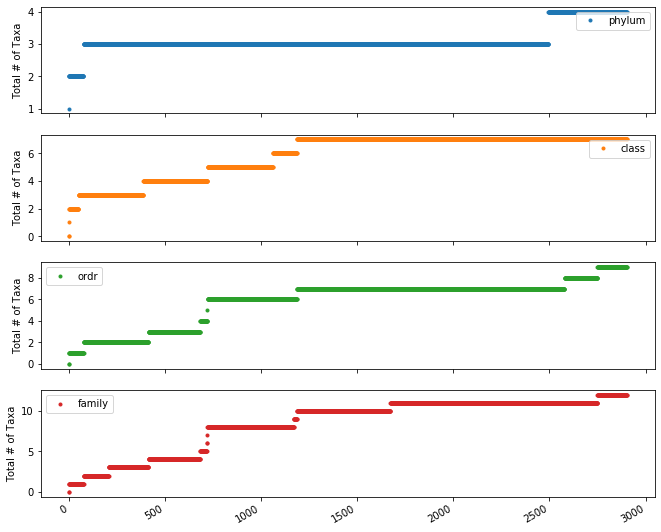

In [288]:
cols_plot = ['phylum', 'class', 'ordr', 'family']
axes = numbers[cols_plot].plot(kind = 'line', marker='.', linestyle='None', figsize=(11, 10), subplots=True)
for ax in axes:
    ax.set_ylabel('Total # of Taxa')

plt.savefig('invert_curve.png')

In [290]:
#Kavita's Code 


taxa = set()
value = ts2.values.tolist()
value

for i in range(len(ts2)):
    for j in range(3,8):
        value[i][j] = str(value[i][j])

entities = set()
lentities = len(entities)
tracker = len(entities)
date2ent = []
counter = {}

for i in range(len(ts2)):
    lentities = len(entities)
    entities.add(tuple(value[i][3:7]))
    tracker = len(entities)
    if tracker != lentities:
        date2ent.append([(value[i][2]),(value[i][3:7])])
    if (tuple(value[i][3:7])) not in counter:
        counter[(tuple(value[i][3:7]))] = 1
    else:
        counter[(tuple(value[i][3:7]))] +=1

def count_over_time(taxonomy):
    tracker = {}
    total = 0
    for i in range(len(time_series)):
        if tuple(value[i][3:7]) == taxonomy:
            total += 1
            tracker[value[i][2]] = total
    return tracker

In [292]:
counter

{('Arthropoda', 'nan', 'nan', 'nan'): 42,
 ('Mollusca', 'nan', 'nan', 'nan'): 118,
 ('Mollusca', 'Bivalvia', 'Ostreioida', 'Pectinidae'): 300,
 ('Mollusca', 'Gastropoda', 'nan', 'nan'): 177,
 ('Mollusca', 'Bivalvia', 'nan', 'nan'): 2161,
 ('Arthropoda', 'Cirripedia', 'nan', 'nan'): 28,
 ('Echinodermata', 'nan', 'nan', 'nan'): 14,
 ('Mollusca', 'Bivalvia', 'Mytiloida', 'Mytilidae'): 5,
 ('Mollusca', 'Bivalvia', 'Ostreioida', 'Ostreidae'): 3,
 ('Arthropoda', 'Maxillopoda', 'nan', 'nan'): 1,
 ('Mollusca', 'Bivalvia', 'Arcoida', 'Arcidae'): 8,
 ('Mollusca', 'Bivalvia', 'Veneroida', 'Mactridae'): 1,
 ('Mollusca', 'Bivalvia', 'Veneroida', 'Tellinidae'): 3,
 ('Mollusca', 'Bivalvia', 'Veneroida', 'Lucinidae'): 16,
 ('Mollusca', 'Bivalvia', 'Nuculoida', 'Yoldiidae'): 5,
 ('Arthropoda', 'Malacostraca', 'Decapoda', 'nan'): 1,
 ('Mollusca', 'Scaphopoda', 'nan', 'nan'): 9,
 ('Mollusca', 'Bivalvia', 'Ostreioida', 'Spondylidae'): 1,
 ('Echinodermata', 'Echinoidea', 'Clypeasteroida', 'Echinarachniidae